In [31]:
#Importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
 # Reading the Data
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


In [3]:
#To get information about the data (generate descriptive statistics)
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,761.000000,761.000000,746.000000,754.00000,762.000000,768.000000,768.000000
mean,3.845052,120.894531,69.339028,20.725361,82.152815,32.13435,0.472196,33.240885,0.348958
std,3.369578,31.972618,18.926330,15.902731,116.102469,7.56570,0.332328,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.40000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,42.500000,32.05000,0.370500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.60000,0.628500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


In [4]:
#Checking the null values
data.isna().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                7
SkinThickness                7
Insulin                     22
BMI                         14
DiabetesPedigreeFunction     6
Age                          0
Outcome                      0
dtype: int64

In [3]:
# Imputing the data (here we can use fillna() also but we need to write separate fillna() statement for every column that needs to be imputed)

imputer = SimpleImputer(missing_values = np.nan,  
                        strategy ='mean') 
imputer = imputer.fit(data)      
data= imputer.transform(data)

In [4]:
#After imputing the null values data set is in np-array format so converting it to dataframe
data=pd.DataFrame(data,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome'])

In [7]:
data.head()       #here I am using head() to display data to check dataframe is created correctly or niot

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [8]:
#Checking if any null values after imputation
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

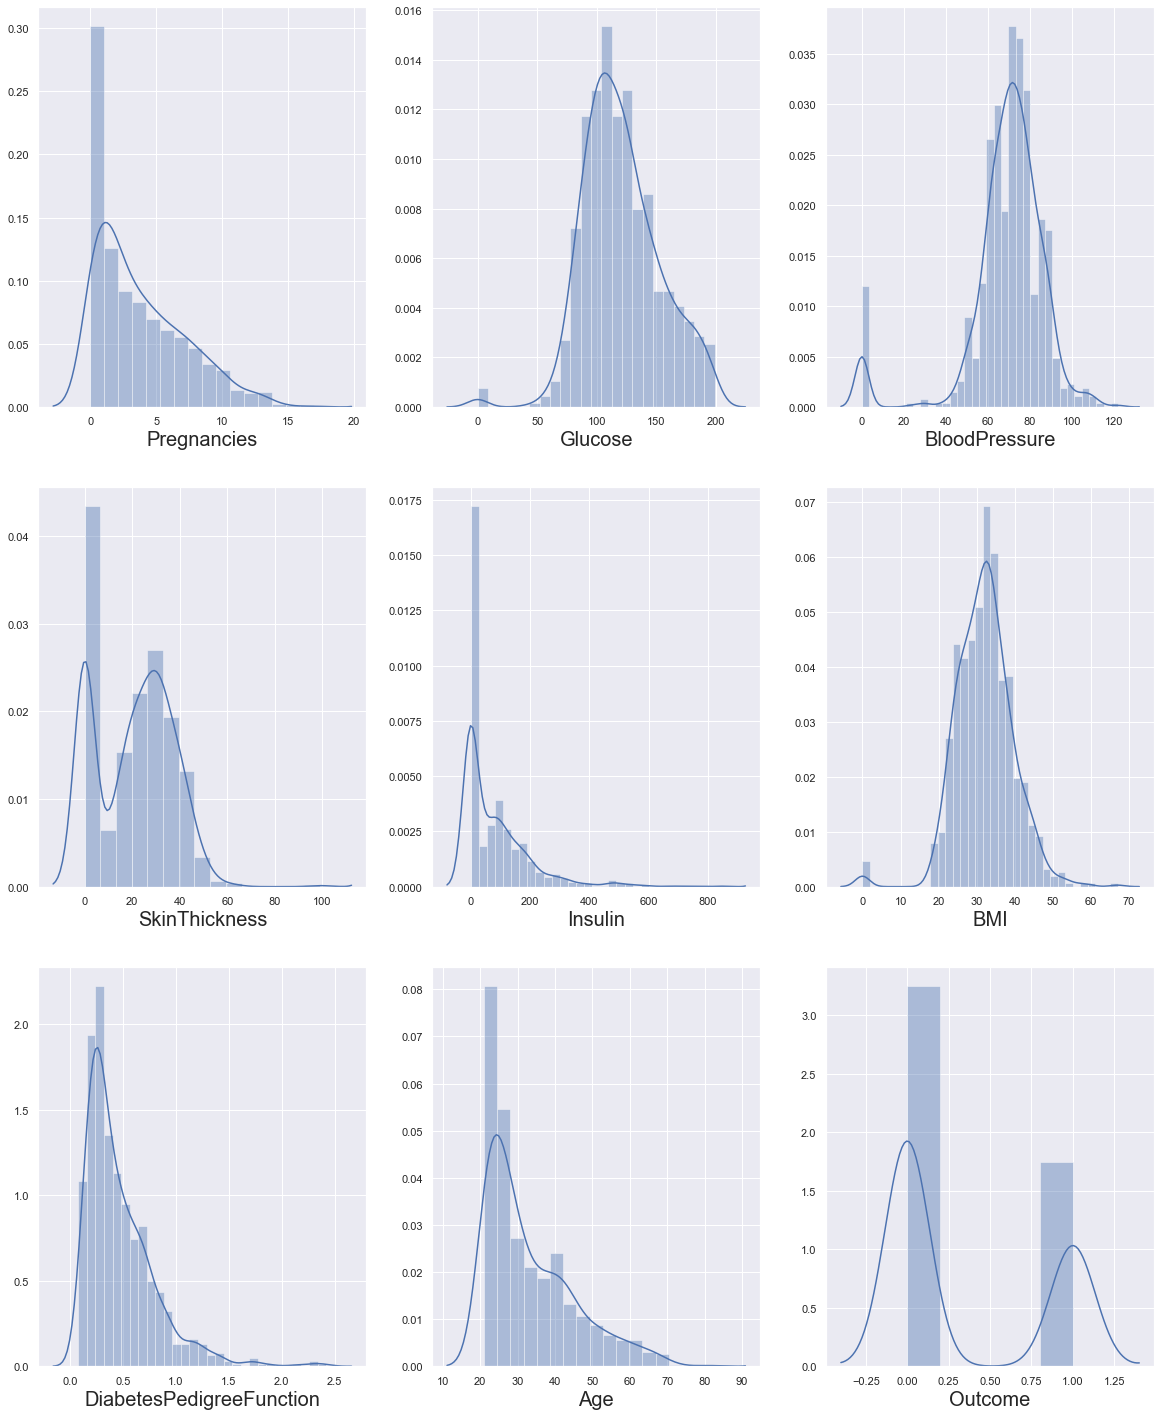

In [9]:
# To check how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### There is some skewness in the data and some columns have value as 0.We simply replace it with their respective  mean values.

In [5]:
# Replacing zero values with the mean of the column

data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].replace(0,data['DiabetesPedigreeFunction'].mean())

#### We can use simple imputer also instead of replace()  but simple imputer replaces 0 in all columns but here we are replacing only in few columns(no need to replace Pregnancies cloumn) so we use replace()

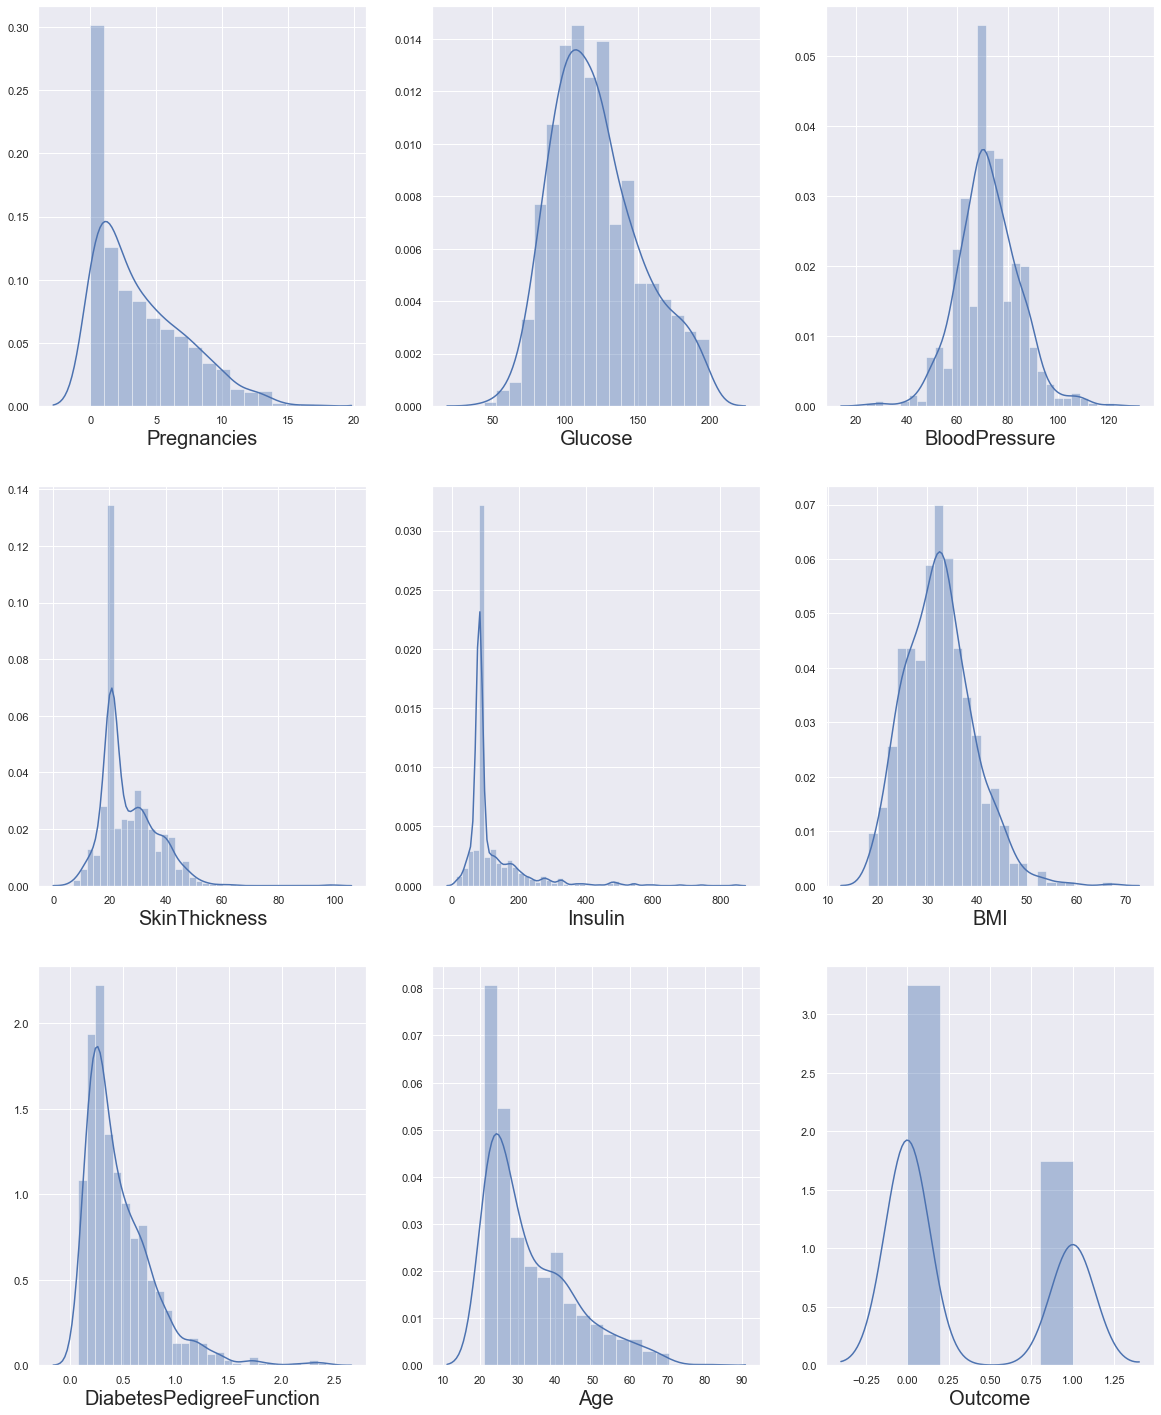

In [11]:
# To see how data is distributed for every column after repalcing 0 values
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

####  There still  outliers present in some columns.Let's deal with them by removing some part of data. 

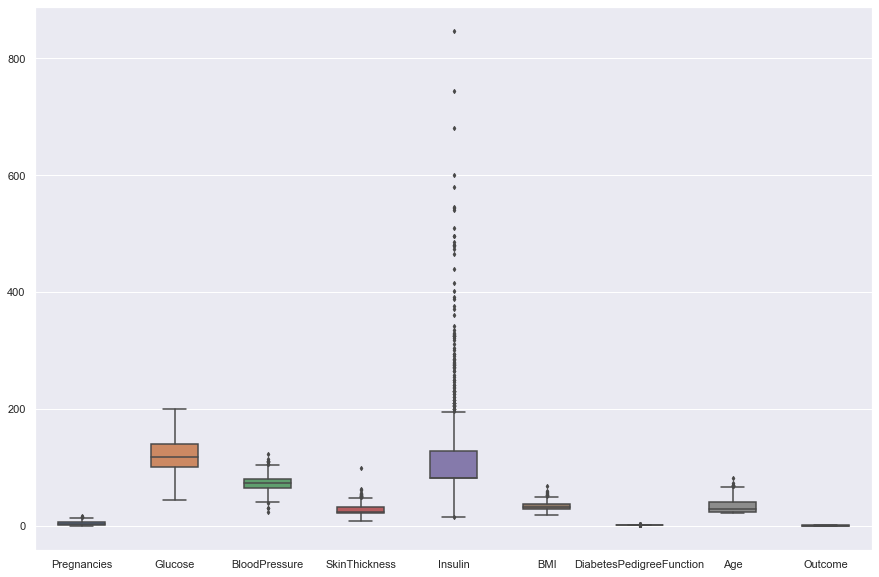

In [12]:
#boxplot to check outliers

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [6]:
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]

q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

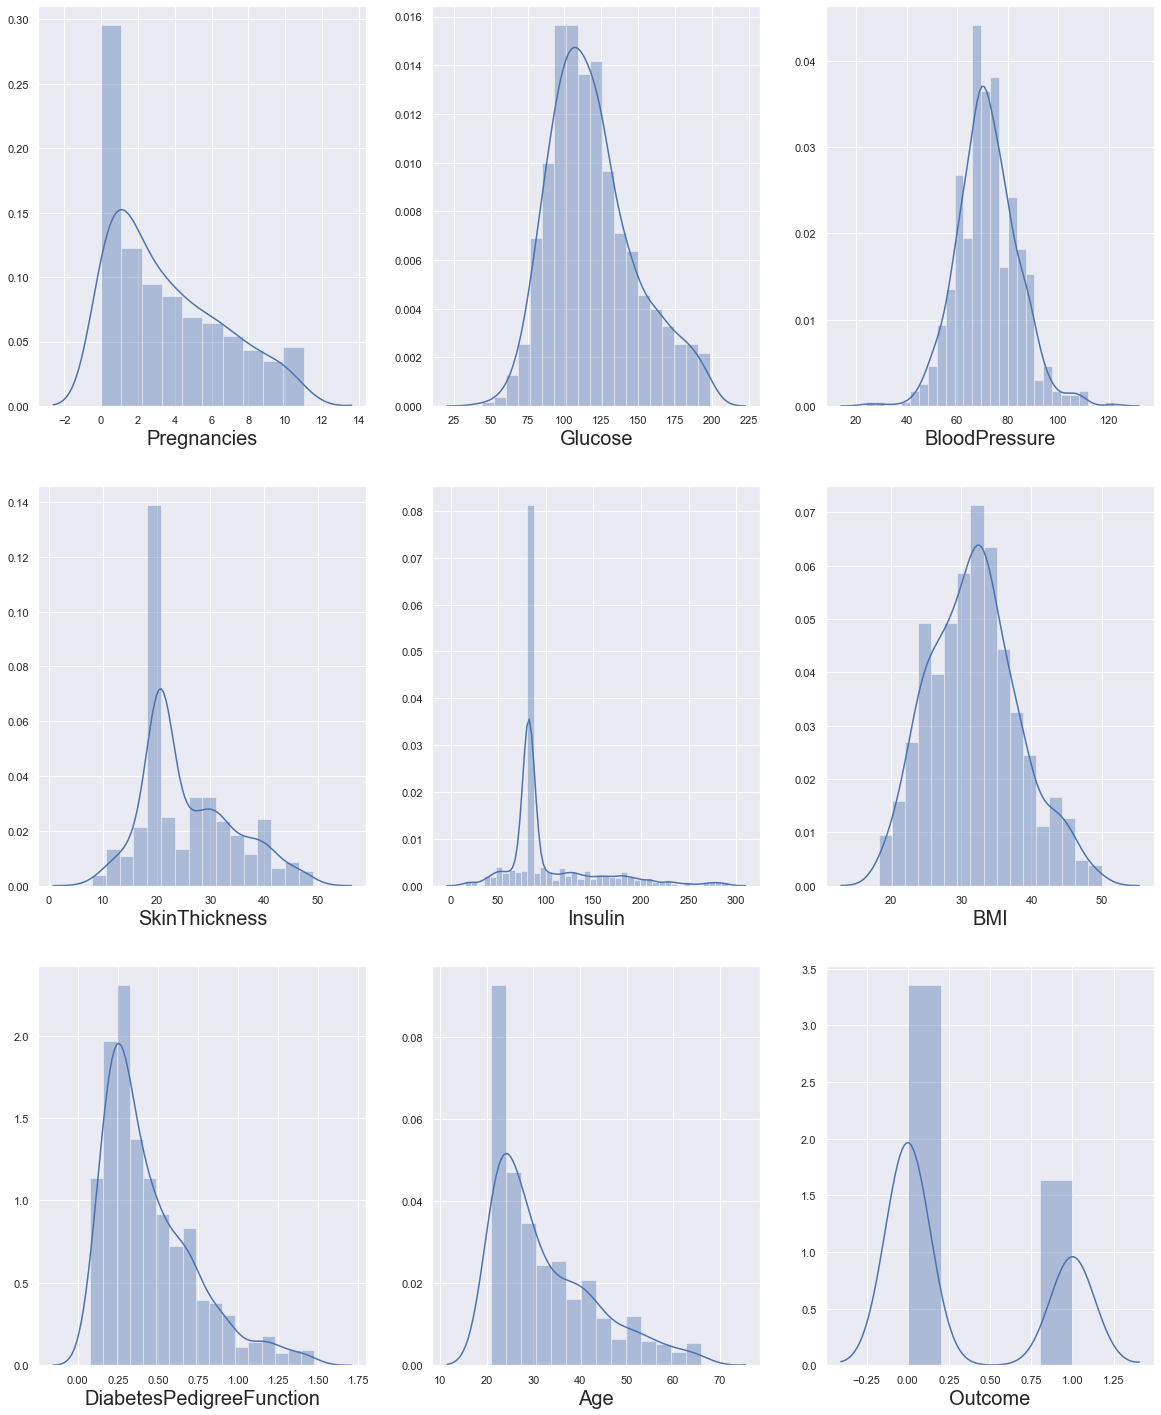

In [14]:
# To check how data is distributed after removing outliers
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

#### The data looks much better now . We will start our analysis with this cleaned data .


In [7]:
X = data_cleaned.drop(columns = ['Outcome'])
y = data_cleaned['Outcome']

#### Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

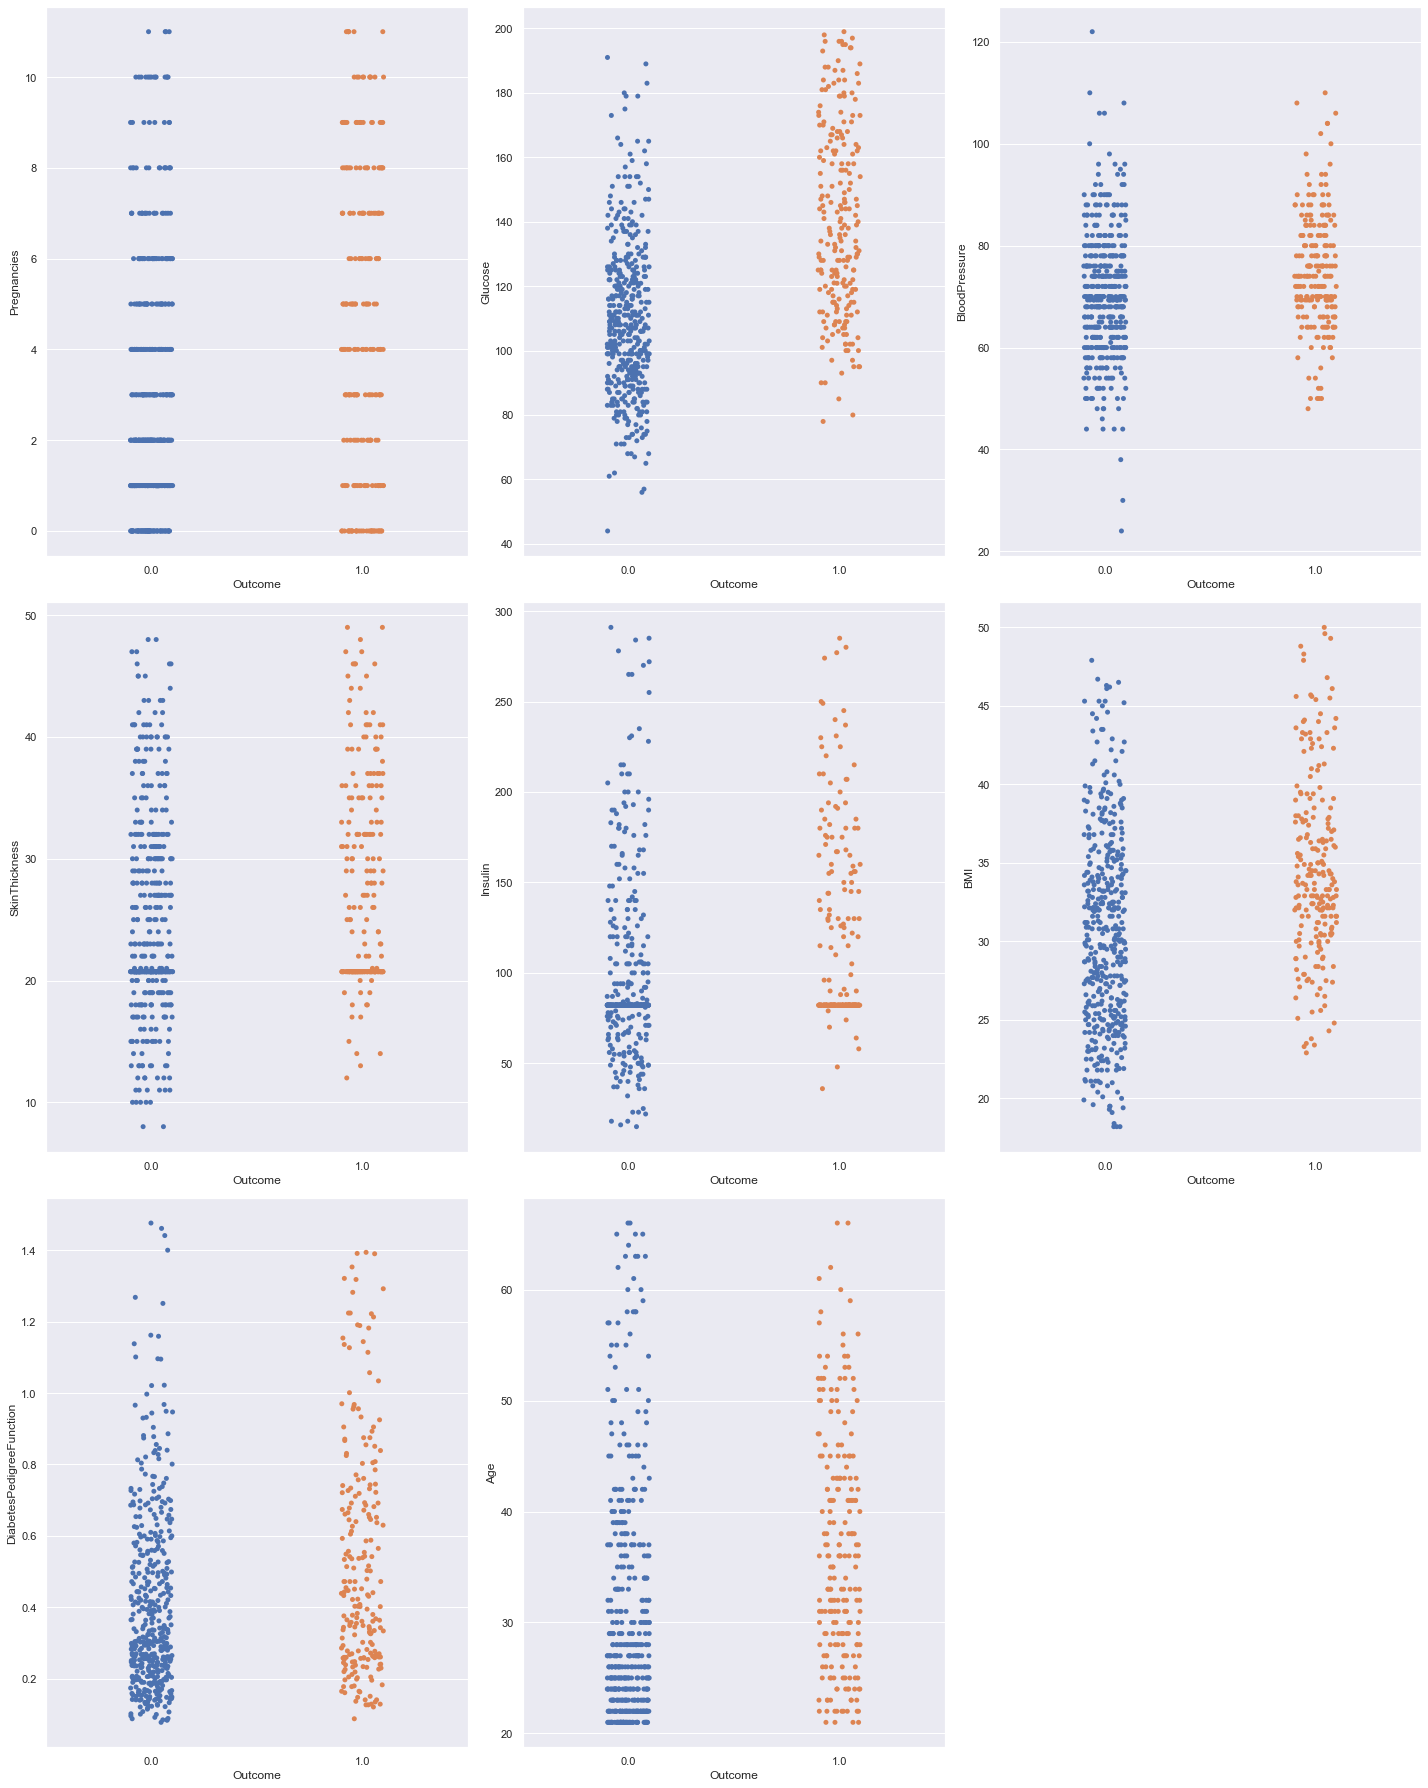

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [9]:
#scaling the data( to make them unitless so there should be no bias)
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

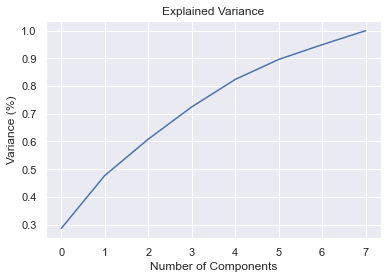

In [10]:
#Using PCA for feature selection (To check whether we need to pass all the features or not)

pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [11]:
#We are using only 6 PCA components instead of all features because we can see that around 95% of the variance is being explained by 6 components.

pca = PCA(n_components=6)
new_data = pca.fit_transform(X_scaled)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])

# LogisticRegression

In [12]:
#We are using train_test_split model for spliting data into train data and test data

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [13]:
#Creating LogisticRegression model 

log_reg = LogisticRegression()

In [14]:
# Training the model

log_reg.fit(x_train,y_train)

LogisticRegression()

In [15]:
#Checking the trained model score

log_reg.score(x_train,y_train)

0.7782178217821782

In [16]:
#Using LogisticRegression model predicting the values for test data (how well our model performs on the test data set.)

y_pred = log_reg.predict(x_test)

In [17]:
#Checking the model score on test data

log_reg.score(x_test,y_test)

0.8224852071005917

In [18]:
#To check the accuracy of the model
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8224852071005917

#### Here we  got 82% of accuracy, It is good .Lets check accuracy by using feature selection model and hyper parameter tunning.

In [19]:
# We are using train_test_split model for spliting data into train data and test data .
# Here principal_x dataframe is used that is created by using PCA components .

x_train,x_test,y_train,y_test = train_test_split(principal_x,y, test_size= 0.25, random_state = 355)
log_reg.fit(x_train,y_train)

LogisticRegression()

In [20]:
# To check score of trained model that is using PCA componenets data.

log_reg.score(x_train,y_train)

0.7702970297029703

In [21]:
# To check score of test data that is using PCA componenets data

log_reg.score(x_test,y_test)

0.8165680473372781

#### By using PCA also we are getting almost same accuracy. So we can use PCA components instead of using all features.

#### So now hypertuning the model to check whether we can get better accuracy score.

In [22]:
# Tuning four hyperparameters, we are passing the different values

param_random={'penalty':['l1','l2'],
              'dual':[True,False],
               'max_iter':[100,110,120,130,140,150],
             'C' : [1.0,1.5,2.0,2.5]
             }

In [23]:
# Passing tuned hyperparametrs to RandomizedSearchCV to create RandomizedSearchCV model

random_search=RandomizedSearchCV(log_reg,param_random)

In [24]:
# Training RandomizedSearchCV model

random_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [1.0, 1.5, 2.0, 2.5],
                                        'dual': [True, False],
                                        'max_iter': [100, 110, 120, 130, 140,
                                                     150],
                                        'penalty': ['l1', 'l2']})

In [25]:
#To get best parameters from passed paramters

random_search.best_params_

{'penalty': 'l2', 'max_iter': 130, 'dual': False, 'C': 2.0}

In [26]:
# Creating LogisticRegression model by using best parametrs that we got from hypertuning.

log_reg=LogisticRegression(penalty='l2',max_iter=100,dual=False,C=2.5)
log_reg.fit(x_train,y_train)

LogisticRegression(C=2.5)

In [27]:
#checking the score of trained model

log_reg.score(x_train,y_train)

0.7702970297029703

In [37]:
#checking the accuracy score of model by passing the test data

log_reg.score(x_test,y_test)

0.8165680473372781

In [36]:
#checking the accuracy score by passing predicted data

y_pred=log_reg.predict(x_test)
accuracy_score(y_test,y_pred)

0.8165680473372781

#### After doing hyperparameter tuning we are getting same accuracy

In [32]:
# Creating confusion matrix to evaluate the model(to check performance metrics)

conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[106,  11],
       [ 20,  32]], dtype=int64)

In [33]:
# Calculating Accuracy

accuracy_score(y_test,y_pred)

0.8165680473372781

In [38]:
# Precison

precision_score(y_test,y_pred)

0.7441860465116279

In [39]:
# Recall

recall_score(y_test,y_pred)

0.6153846153846154

In [41]:
# F1 Score to identify model performance

f1_score(y_test,y_pred)

0.6736842105263158

In [42]:
# Area Under Curve to determine which model is the best one to use for a given dataset. 
auc = roc_auc_score(y_test, y_pred)
auc

0.7606837606837606

In [43]:
#To calculate threshold,false_positive_rate and true_positive_rate

false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test, y_pred)

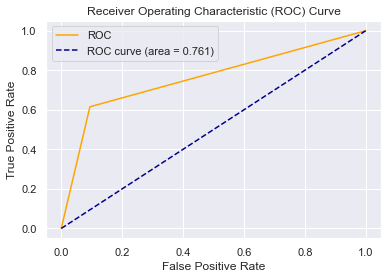

In [44]:
#plotting ROC Curve

plt.plot(false_positive_rate, true_positive_rate, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.3f)'% auc )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### For the given dataset we can create Logistic Regression model using PCA components.

# KNN

In [45]:
#We are using train_test_split model for spliting data into train data and test data

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)


#Creating KNN model 

knn = KNeighborsClassifier()

In [46]:
# Training the model

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
#Checking the trained model score

knn.score(x_train,y_train)

0.8237623762376237

In [48]:
#Checking the model score on test data

knn.score(x_test,y_test)

0.7692307692307693

In [49]:
#Predicting the data using knn model

y_pred = knn.predict(x_test)

In [50]:
#To check the accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7692307692307693

#### Here we  got  76% of accuracy, It is good .Lets check accuracy by using feature selection model and hyper parameter tunning. 

In [51]:
# We are using train_test_split model for spliting data into train data and test data .
# Here principal_x dataframe is used that is created by using PCA components .

x_train,x_test,y_train,y_test = train_test_split(principal_x,y, test_size= 0.25, random_state = 355)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [52]:
# To check score of trained model that is using PCA componenets data.

knn.score(x_train,y_train)

0.8118811881188119

In [53]:
# To check score of test data that is using PCA componenets data.

knn.score(x_test,y_test)

0.7633136094674556

#### By using PCA also we are getting almost same accuracy. So we can use PCA components instead of using all features.

#### So now hypertuning the model to check whether we can get better accuracy score.

In [54]:
# Tuning three hyperparameters, we are passing the different values

param_random = { 'algorithm': ['ball_tree', 'kd_tree',  'brute'],
                'leaf_size': [10, 18, 28, 32, 40, 42, 55],
                'n_neighbors': [3, 5, 7, 9, 10, 11, 12,13]
               }

In [55]:
# Passing tuned hyperparametrs to RandomizedSearchCV to create RandomizedSearchCV model

random_search=RandomizedSearchCV(knn,param_random)

In [56]:
# Training RandomizedSearchCV model

random_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [10, 18, 28, 32, 40, 42,
                                                      55],
                                        'n_neighbors': [3, 5, 7, 9, 10, 11, 12,
                                                        13]})

In [57]:
#To get best parameters from passed paramters

random_search.best_params_

{'n_neighbors': 13, 'leaf_size': 32, 'algorithm': 'ball_tree'}

In [58]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.

knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size =28, n_neighbors =13)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=13)

In [59]:
#checking the score of trained model

knn.score(x_train,y_train)

0.7762376237623763

In [60]:
#checking the accuracy score of model by passing the test data

knn.score(x_test,y_test)

0.7633136094674556

In [61]:
#checking the accuracy score by passing predicted data

y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.7633136094674556

#### After doing hyperparameter tuning we are getting same accuracy

In [62]:
# Creating confusion matrix to evaluate the model(to check performance metrics)

conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[104,  13],
       [ 27,  25]], dtype=int64)

In [63]:
# Calculating Accuracy

accuracy_score(y_test,y_pred)

0.7633136094674556

In [64]:
# Precison

precision_score(y_test,y_pred)

0.6578947368421053

In [65]:
# Recall

recall_score(y_test,y_pred)

0.4807692307692308

In [66]:
# F1 Score to identify model performance

f1_score(y_test,y_pred)

0.5555555555555556

In [67]:
# Area Under Curve to determine which model is the best one to use for a given dataset. 
auc1 = roc_auc_score(y_test, y_pred)
auc1

0.6848290598290598

In [68]:
#To calculate threshold,false_positive_rate and true_positive_rate

false_positive_rate1,true_positive_rate1, thresholds1 = roc_curve(y_test, y_pred)

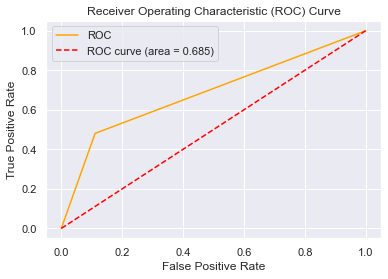

In [69]:
# Plotting ROC curve

plt.plot(false_positive_rate1, true_positive_rate1,color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='red', linestyle='--',label='ROC curve (area = %0.3f)'% auc1 )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### For the given dataset we can create KNN model using PCA components.

# Decision Tree 

In [70]:
#We are using train_test_split model for spliting data into train data and test data

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)


#Creating DecisionTree model and training the model

clf = DecisionTreeClassifier()


In [71]:
# Training the model

clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [72]:
#Checking the trained model score

clf.score(x_train,y_train)

1.0

In [73]:
# Checking the model score for test data
clf.score(x_test,y_test)

0.6390532544378699

In [74]:
#Predicting the data using Decision Tree model

y_pred = clf.predict(x_test)

In [75]:
#To check the accuracy

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6390532544378699

#### Here we  got  64% of accuracy.Lets check can we increase accuracy by using feature selection model and hyper parameter tunning. 

In [76]:
#We are using train_test_split model for spliting data into train data and test data
# Here principal_x dataframe is used that is created by using PCA components .

x_train,x_test,y_train,y_test = train_test_split(principal_x,y, test_size= 0.25, random_state = 355)
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
# To check score of trained model that is using PCA componenets data.

clf.score(x_train,y_train)

1.0

In [78]:
# To check score of test data that is using PCA componenets data.

clf.score(x_test,y_test)

0.6863905325443787

In [79]:
#Predicting the data using Decision Tree model

y_pred = clf.predict(x_test)

In [80]:
#To check the accuracy

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6863905325443787

##### By using PCA there is increase in accuracy. So we can use PCA components instead of using all features.

#### So now hypertuning the model to check whether we can get better accuracy score.

In [81]:
# Tuning five hyperparameters, we are passing the different values

param_random = { 'criterion': ['gini', 'entropy'],
    'max_depth' : [2,4,8,12,16,18,24,32,38],
    'min_samples_leaf' : [2,4,8,12,16,18,24,32,38],
    'min_samples_split': [2,4,8,12,16,18,24,32,38],
    'splitter' : ['best', 'random']
    }

In [82]:
# Passing tuned hyperparametrs to RandomizedSearchCV to create RandomizedSearchCV model

random_search=RandomizedSearchCV(clf,param_random)

In [83]:
# Training RandomizedSearchCV model

random_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 8, 12, 16, 18, 24,
                                                      32, 38],
                                        'min_samples_leaf': [2, 4, 8, 12, 16,
                                                             18, 24, 32, 38],
                                        'min_samples_split': [2, 4, 8, 12, 16,
                                                              18, 24, 32, 38],
                                        'splitter': ['best', 'random']})

In [84]:
#To get best parameters from passed paramters

random_search.best_params_

{'splitter': 'random',
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_depth': 4,
 'criterion': 'entropy'}

In [85]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.

clf = DecisionTreeClassifier(criterion = 'gini', max_depth =32, min_samples_leaf= 38, min_samples_split= 38 ,splitter ='best')
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=32, min_samples_leaf=38, min_samples_split=38)

In [86]:
#checking the score of trained model

clf.score(x_train,y_train)

0.7762376237623763

In [87]:
#checking the accuracy score of model by passing the test data

clf.score(x_test,y_test)

0.757396449704142

In [88]:
#Checking accuracy score

y_pred=clf.predict(x_test)
accuracy_score(y_pred,y_test)

0.757396449704142

####  After doing hyperparameter tuning we are getting increased accuracy

In [89]:
# Creating confusion matrix to evaluate the model(to check performance metrics)

conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[102,  15],
       [ 26,  26]], dtype=int64)

In [90]:
# Calculating Accuracy

accuracy_score(y_test,y_pred)

0.757396449704142

In [91]:
# Precison

precision_score(y_test,y_pred)

0.6341463414634146

In [92]:
# Recall

recall_score(y_test,y_pred)

0.5

In [93]:
# F1 Score to identify model performance

f1_score(y_test,y_pred)

0.5591397849462365

In [94]:
# Area Under Curve to determine which model is the best one to use for a given dataset. 
auc2 = roc_auc_score(y_test, y_pred)
auc2


0.6858974358974359

In [95]:
#To calculate threshold,false_positive_rate and true_positive_rate

false_positive_rate2,true_positive_rate2, thresholds2 = roc_curve(y_test, y_pred)

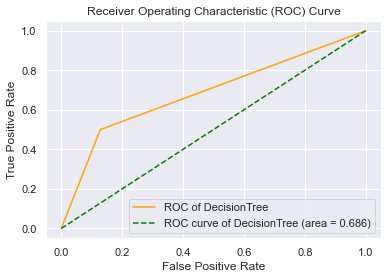

In [96]:
# Plotting ROC curve 

plt.plot(false_positive_rate2, true_positive_rate2,color='Orange', label='ROC of DecisionTree')
plt.plot([0, 1], [0, 1],color='green', linestyle='--',label='ROC curve of DecisionTree (area = %0.3f)'% auc2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

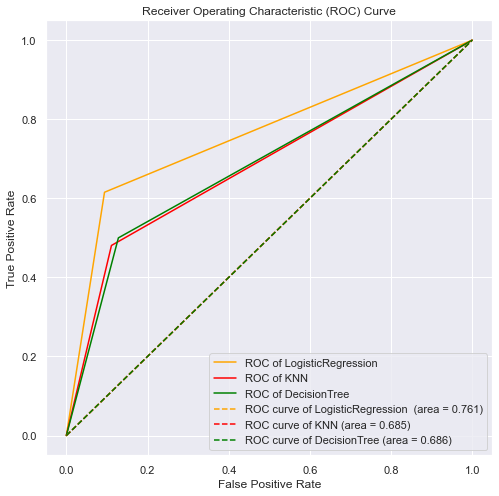

In [100]:
# Plotting ROC curve for LogisticRegression,KNN and DecisionTree to find which model is good to use for given dataset

#plt.plot(false_positive_rate2, true_positive_rate2,false_positive_rate1, true_positive_rate1,false_positive_rate, true_positive_rate,color='orange', label='ROC')
plt.figure(figsize=(8,8))
plt.plot(false_positive_rate, true_positive_rate,color='orange', label='ROC of LogisticRegression')
plt.plot(false_positive_rate1, true_positive_rate1,color='red', label='ROC of KNN')
plt.plot(false_positive_rate2, true_positive_rate2,color='green', label='ROC of DecisionTree')


plt.plot([0, 1], [0, 1],color='orange', linestyle='--',label='ROC curve of LogisticRegression  (area = %0.3f)'% auc )
plt.plot([0, 1], [0, 1],color='red', linestyle='--',label='ROC curve of KNN (area = %0.3f)'% auc1 )
plt.plot([0, 1], [0, 1],color='green', linestyle='--',label='ROC curve of DecisionTree (area = %0.3f)'% auc2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### For the given dataset we can create Decision Tree using PCA components and hyperparameter tunning increases the accuracy.

### Conclusion

####  For a given dataset we created model using  LogisticRegression,KNN and DecisionTree algorithm. The best model we can use to predict the data for this data set  is LogisticRegression model because using  LogisticRegression model we get best accuracy score ,F1 score and AUC (as shown in the above figure) compared to KNN and Decision Tree.